Task 05: Peronal Loan Acceptance Prediction.

Objective: Predict which customers are likely to accept a personal loan offer.

Dataset:
Bank Marketing Dataset (UCI Machine learning Repository).
About Dataset:
UCI-Bank-Marketing-Dataset.
The following information is drawn from the UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/bank+marketing.
Abstract:
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).
Source:
[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014.
Data Set Information:
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.
There are four datasets:
Bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014] <-- this is used 2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs. 3) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs). 4) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).
The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

Load the Dataset:

In [1]:
import pandas as pd

In [2]:
Dataset = pd.read_csv("bank-additional-full.csv")

In [3]:
Dataset = pd.read_csv("bank-additional-full.csv", sep=";")

Data Exploration:

In [4]:
Dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
Dataset.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [6]:
Dataset.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
Dataset.shape

(41188, 21)

In [9]:
Dataset.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [10]:
Dataset.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

Perofrm basic data exploration on features such as age, job and martial status.

For job:

In [11]:
Dataset["job"].value_counts()

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

In [12]:
Dataset["job"].describe()

count      41188
unique        12
top       admin.
freq       10422
Name: job, dtype: object

For age:

In [13]:
Dataset["age"].value_counts()

age
31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
89       2
91       2
94       1
87       1
95       1
Name: count, Length: 78, dtype: int64

In [14]:
Dataset["age"].describe()

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

For marital status:

In [15]:
Dataset["marital"].value_counts()

marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

In [16]:
Dataset["marital"].describe()

count       41188
unique          4
top       married
freq        24928
Name: marital, dtype: object

Basic Data Visulaization:

In [17]:
import matplotlib as pyplot
from matplotlib import pyplot as plt
import seaborn as sns

Age Histogram:

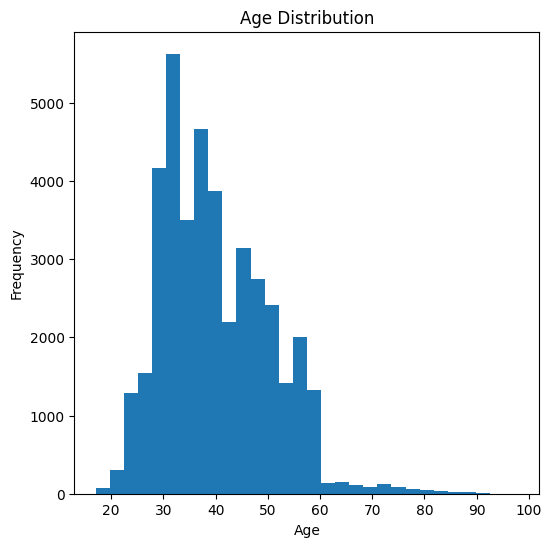

In [18]:
plt.figure(figsize = (6,6))

plt.hist(Dataset["age"], bins = 30)

plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution")

plt.show()

Job Count Plot:

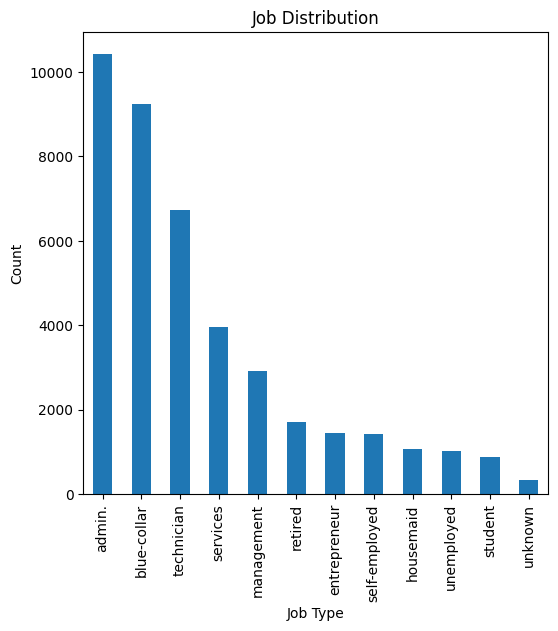

In [19]:
plt.figure(figsize = (6,6))

Dataset["job"].value_counts().plot(kind="bar")

plt.xlabel("Job Type")
plt.ylabel("Count")
plt.title("Job Distribution")

plt.show()

Marital Status Plot:

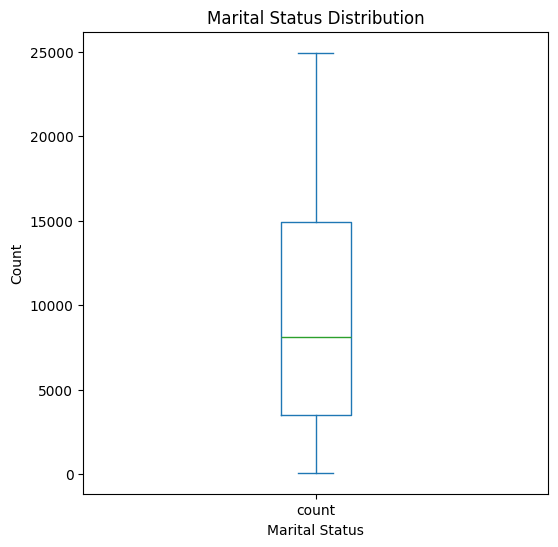

In [20]:
plt.figure(figsize = (6,6))

Dataset["marital"].value_counts().plot(kind="box")

plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.title("Marital Status Distribution")

plt.show()


Pairplot:

<Figure size 600x600 with 0 Axes>

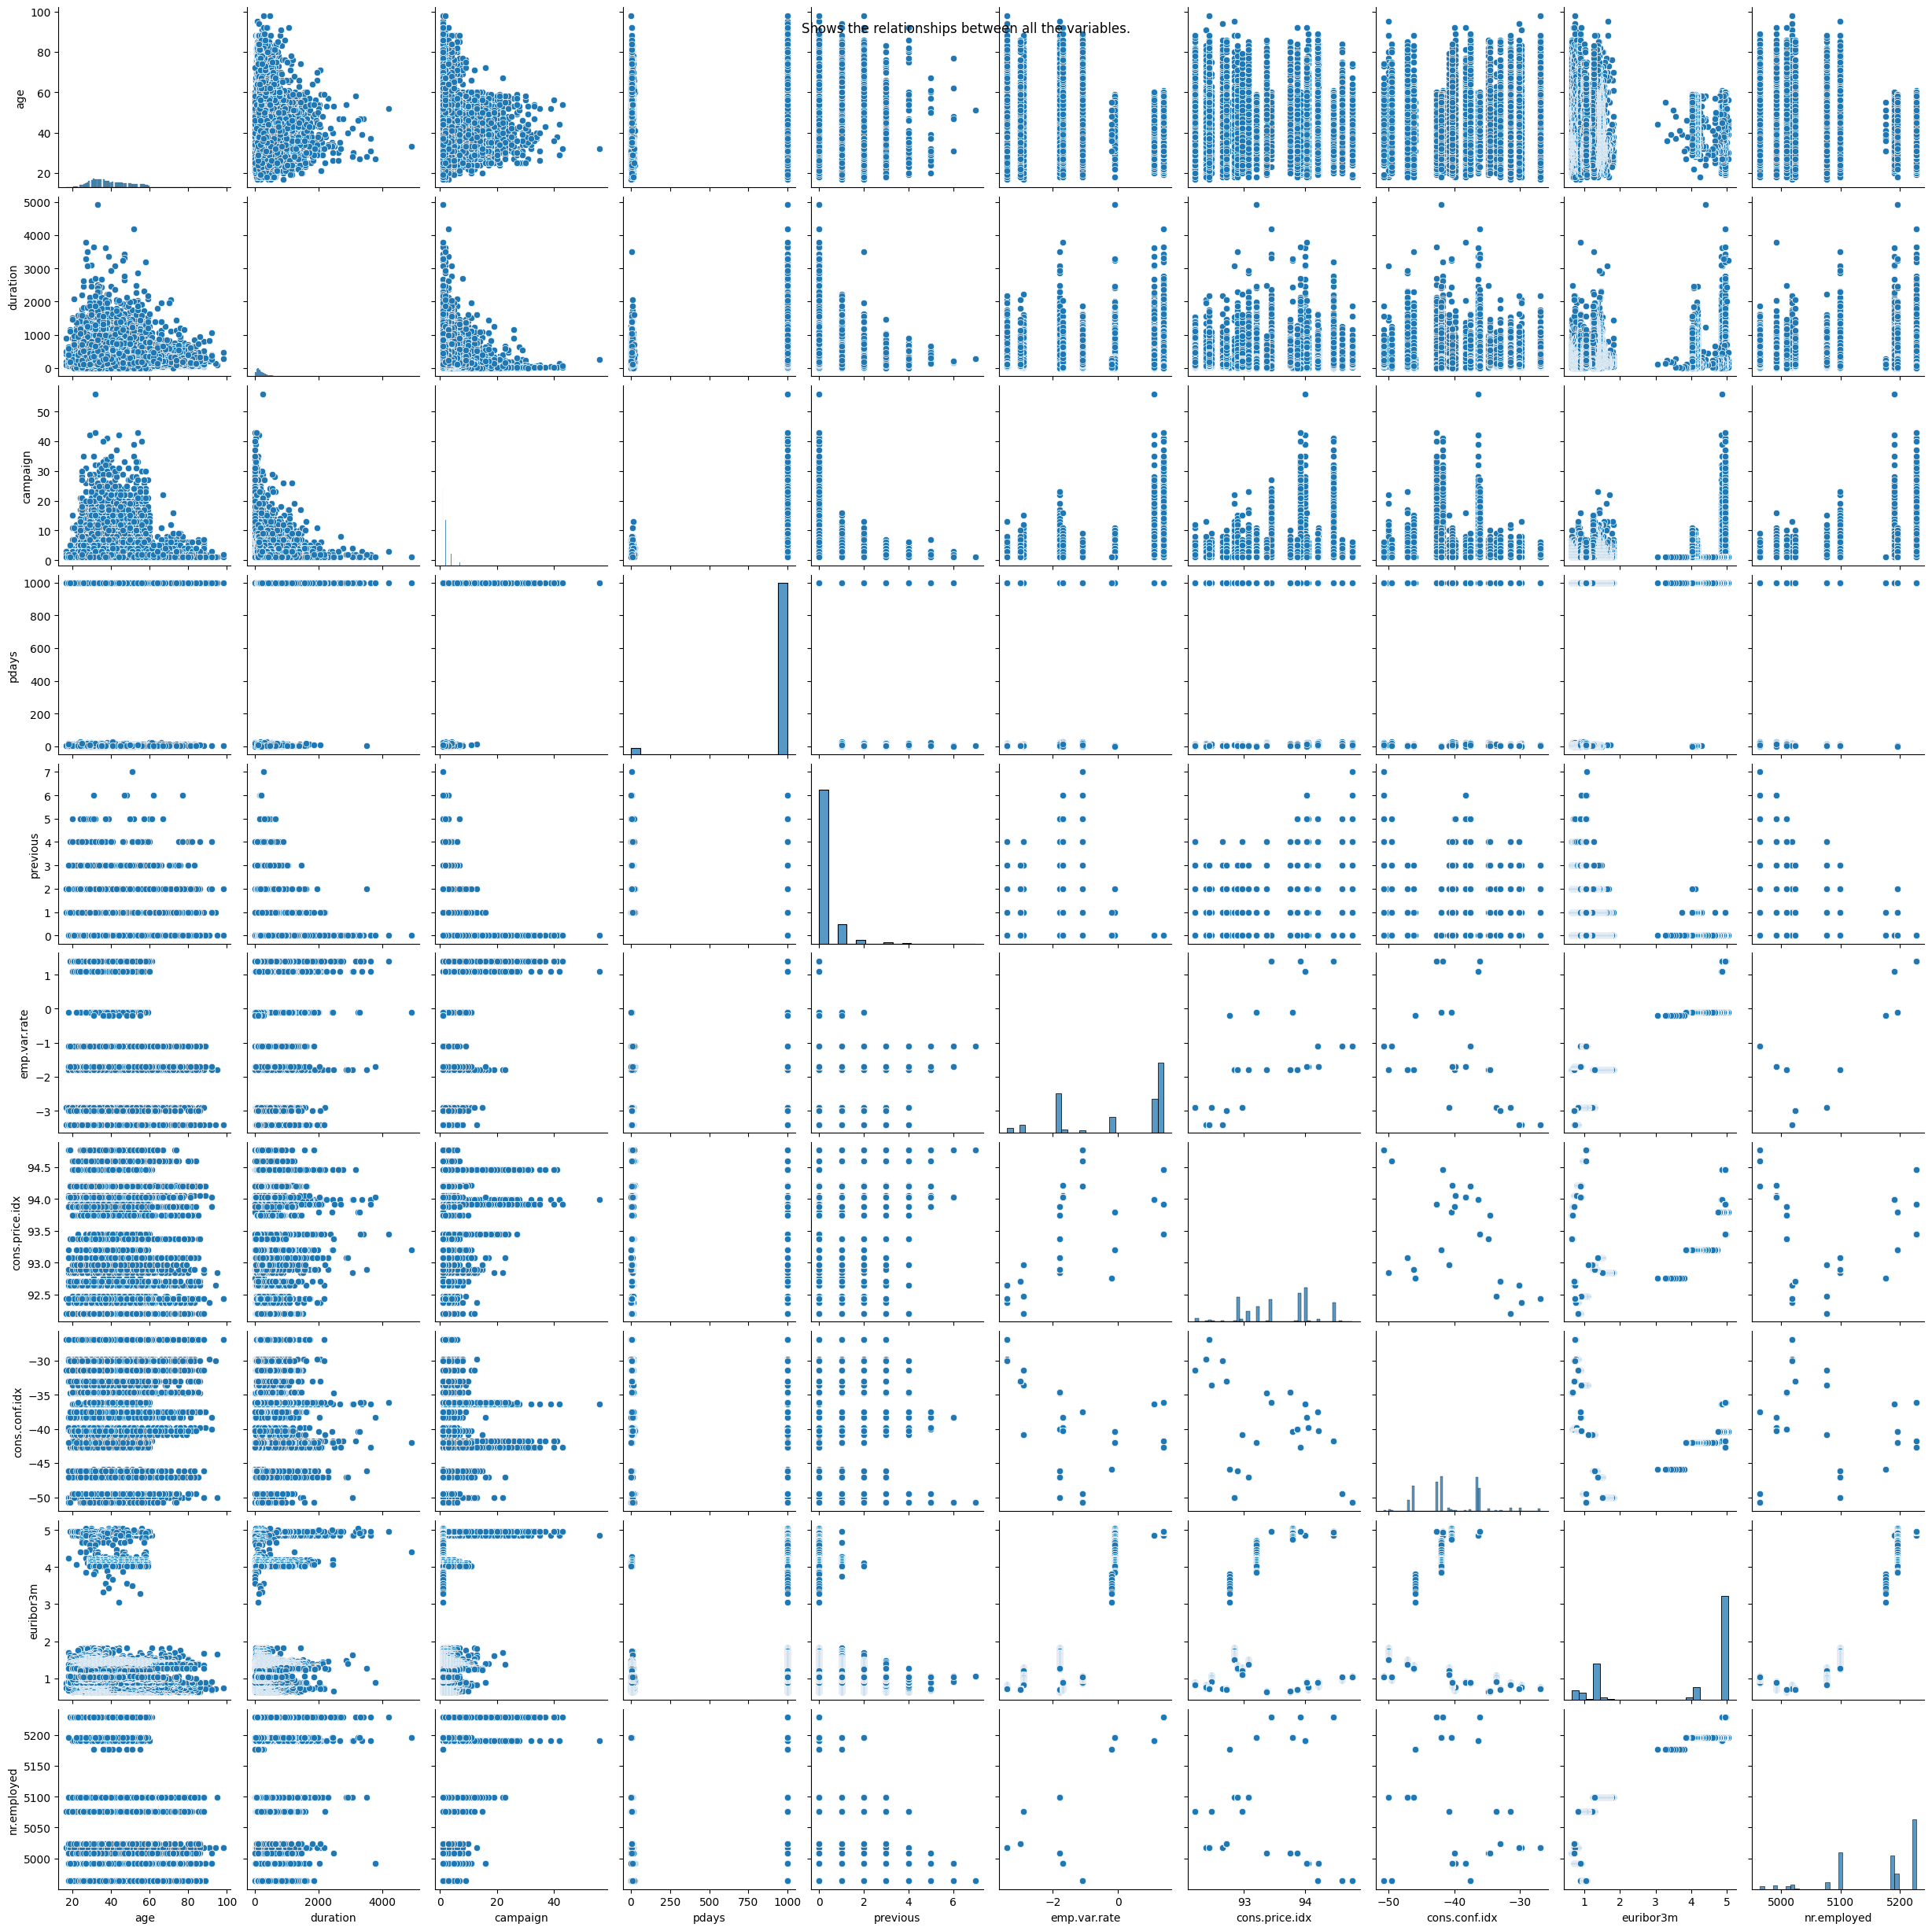

In [21]:
plt.figure(figsize=(6,6))

sns.pairplot(Dataset)

plt.suptitle("Shows the relationships between all the variables.")

plt.show()

Analyze the results to identify which customer groups are likely to accept the offer.

Acceptance Rate by Job:

In [22]:
pd.crosstab(Dataset["job"], Dataset["y"], normalize="index") * 100

y,no,yes
job,,
admin.,87.027442,12.972558
blue-collar,93.105684,6.894316
entrepreneur,91.483516,8.516484
housemaid,90.000000,10.000000
management,88.782490,11.217510
retired,74.767442,25.232558
self-employed,89.514426,10.485574
services,91.861930,8.138070
student,68.571429,31.428571


Acceptance Rate by Marital Status:

In [23]:
pd.crosstab(Dataset["marital"], Dataset["y"], normalize="index") * 100

y,no,yes
marital,,
divorced,89.679098,10.320902
married,89.842747,10.157253
single,85.995851,14.004149
unknown,85.000000,15.000000


Acceptance Rate by Age Groups:

In [24]:
Dataset["age_group"] = pd.cut(Dataset["age"], bins=[18,30,40,50,60,100])

pd.crosstab(Dataset["age_group"], Dataset["y"], normalize="index") * 100

y,no,yes
age_group,,
"(18, 30]",84.897959,15.102041
"(30, 40]",90.253280,9.746720
"(40, 50]",91.826172,8.173828
"(50, 60]",89.346093,10.653907
"(60, 100]",54.505495,45.494505


Handle Missing Values:

In [25]:
Dataset.isnull().sum()

age                0
job                0
marital            0
education          0
default            0
housing            0
loan               0
contact            0
month              0
day_of_week        0
duration           0
campaign           0
pdays              0
previous           0
poutcome           0
emp.var.rate       0
cons.price.idx     0
cons.conf.idx      0
euribor3m          0
nr.employed        0
y                  0
age_group         33
dtype: int64

In [26]:
Dataset = pd.get_dummies(Dataset, drop_first=True)

In [27]:
Dataset.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes,"age_group_(30, 40]","age_group_(40, 50]","age_group_(50, 60]","age_group_(60, 100]"
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,False,True,False,False,False,False,True,False
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,False,True,False,False,False,False,True,False
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,False,True,False,False,True,False,False,False
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,False,True,False,False,True,False,False,False
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,False,True,False,False,False,False,True,False


Train a Logistic Regression and Decision Tree Classifier.

Logestic Regression:

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, confusion_matrix

In [29]:
x = Dataset.drop("y_yes", axis=1)
y = Dataset["y_yes"]

In [30]:
x = pd.get_dummies(x, drop_first=True)

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [32]:
print("Training Data:", x_train.shape)
print("Testing Data:", x_test.shape)

Training Data: (32950, 57)
Testing Data: (8238, 57)


In [33]:
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(x_train, y_train)

y_predict_logistic = logistic_model.predict(x_test)

c:\Users\zaigh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
model = LogisticRegression()
model.fit(x_train, y_train)

c:\Users\zaigh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Evaluate the model using the accuracy and confusion matrix.

In [35]:
print("Logistic Regression Accuracy: \n",
      accuracy_score(y_test, y_predict_logistic))

print("Confusion Matrix: \n",
      confusion_matrix(y_test, y_predict_logistic))

Logistic Regression Accuracy: 
 0.9107793153678078
Confusion Matrix: 
 [[7106  197]
 [ 538  397]]


In [36]:
cm = confusion_matrix(y_test, y_predict_logistic)
TN, FP, FN, TP = cm.ravel()

# Create a Structured Table.
metrics_table = pd.DataFrame({
    'Metric': ['TP', 'TN', 'FP', 'FN', 'Accuracy', 'Precision', 'Recall'],
    'Value': [TP, TN, FP, FN,
              (TP+TN)/(TP+TN+FP+FN),
              TP/(TP+FP),
              TP/(TP+FN)]})

print(metrics_table)

      Metric        Value
0         TP   397.000000
1         TN  7106.000000
2         FP   197.000000
3         FN   538.000000
4   Accuracy     0.910779
5  Precision     0.668350
6     Recall     0.424599


Decision Tree:

In [37]:
decisionTree_model = DecisionTreeClassifier(random_state=42)

decisionTree_model.fit(x_train, y_train)

y_predict_decisionTree = decisionTree_model.predict(x_test)

Evaluate the model using the accuracy and confusion matrix.

In [38]:
print("Decision Tree Accuracy: \n",
      accuracy_score(y_test, y_predict_decisionTree))

print("Confusion Matrix: \n",
      confusion_matrix(y_test, y_predict_decisionTree))

Decision Tree Accuracy: 
 0.8869871327992231
Confusion Matrix: 
 [[6816  487]
 [ 444  491]]


In [39]:
cm = confusion_matrix(y_test, y_predict_decisionTree)
TN, FP, FN, TP = cm.ravel()

# Create a Structured Table.
metrics_table = pd.DataFrame({
    'Metric': ['TP', 'TN', 'FP', 'FN', 'Accuracy', 'Precision', 'Recall'],
    'Value': [TP, TN, FP, FN,
              (TP+TN)/(TP+TN+FP+FN),
              TP/(TP+FP),
              TP/(TP+FN)]})
print(metrics_table)

      Metric        Value
0         TP   491.000000
1         TN  6816.000000
2         FP   487.000000
3         FN   444.000000
4   Accuracy     0.886987
5  Precision     0.502045
6     Recall     0.525134


Skills:
Data exploratiion and visulization.
Classification modeling.
Business insights extraction from the data.

Task Completed.
Best Wishes.
Zaigham Abbas.